Accuracy: 0.8902743142144638
Precision: 1.0
Recall: 0.022222222222222223
F1-score: 0.04347826086956522


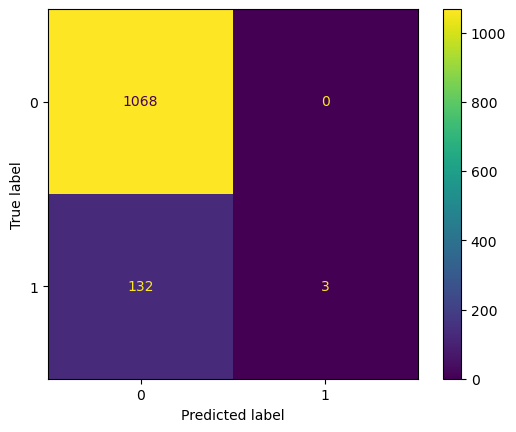

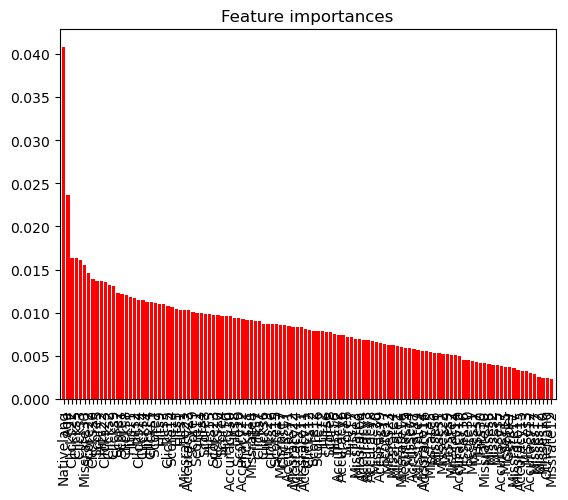

Test Score: 0.8902743142144638
Predictions from Random Forest: [0]
Predictions from Gradient Boosting: [1]
Predictions from AdaBoost: [1]
Predictions from Logistic Regression: [1]
Predictions from Support Vector Machine: [0]


C:\Users\Pritika_2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [2]:
import pandas as pd
import numpy as np
import csv
from sklearn.model_selection import train_test_split
from collections import defaultdict
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
desktopData= pd.read_csv("Dyt-desktop.csv", index_col=0, na_values=['(NA)'])
tabletData = pd.read_csv("Dyt-desktop.csv", index_col=0, na_values=['(NA)'])
def SeparateColumns(dataSetName):
    columns = defaultdict(list)
    with open(dataSetName, 'r') as f:
        reader = csv.reader(f, delimiter=';')
        headers = next(reader)
        column_nums = range(len(headers)) # Do NOT change to xrange
        for row in reader:
            for i in column_nums:

                columns[headers[i]].append(row[i])
    # Following line is only necessary if you want a key error for invalid column names
    return dict(columns)
def cleanData(data) :
    for col in data.columns.values:
        data[col] = data[col].astype('string')
    #----------
    for col in data.columns.values:
        data[col] = data[col].astype('float',errors = 'ignore')
    #-----------
    data['Gender']=data.Gender.map({'Male': 1, 'Female': 2})
    data['Dyslexia']=data.Dyslexia.map({'No': 0, 'Yes': 1})
    data['Nativelang']=data.Nativelang.map({'No': 0, 'Yes': 1})
    data['Otherlang']=data.Otherlang.map({'No': 0, 'Yes': 1})
columns = SeparateColumns('Dyt-desktop.csv')
desktopData=pd.DataFrame.from_dict(columns)

desktopData
cleanData(desktopData)
desktopData.head()
columns = SeparateColumns('Dyt-desktop.csv')
tabletData=pd.DataFrame.from_dict(columns)
tabletData.replace(["NULL"], np.nan, inplace = True)

tabletData
cleanData(tabletData)

tabletData.head()
stateOfNUll= tabletData.isnull().any()
i = 0
for state in stateOfNUll :
    if(state):
        tabletData[stateOfNUll.index[i]].fillna(round(tabletData[stateOfNUll.index[i]].mean() , 4), inplace=True)
    i = i + 1

tabletData
cols_with_missing = [col for col in tabletData.columns if tabletData[col].isnull().any()]

# Drop columns desktop data
reduced_desktopData = desktopData.drop(cols_with_missing, axis=1)

# Drop columns tablet data
reduced_tabletData = tabletData.drop(cols_with_missing, axis=1)
commonalityColumns = ['Gender','Nativelang','Otherlang','Age' , 'Dyslexia']
for i in  range(30):
    if((i>=0 and i<12) or (i>=13 and i<17) or i==21 or i==22 or i==29):
        commonalityColumns.append('Clicks'+str(i+1))
        commonalityColumns.append('Hits'+str(i+1))
        commonalityColumns.append('Misses'+str(i+1))
        commonalityColumns.append('Score'+str(i+1))
        commonalityColumns.append('Accuracy'+str(i+1))
        commonalityColumns.append('Missrate'+str(i+1))

reduced_desktopData=reduced_desktopData.loc[:,commonalityColumns]
reduced_tabletData=reduced_tabletData.loc[:,commonalityColumns]
y=reduced_desktopData['Dyslexia']
X=reduced_desktopData.loc[:, reduced_desktopData.columns != 'Dyslexia']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# ... (your existing code for data loading, preprocessing, and train-test split) ...

rfc = RandomForestClassifier()
rfc.fit(X_train , y_train)
y_pred = rfc.predict(X_test)

# Evaluation Metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Feature Importance Graph
feature_importances = rfc.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), feature_importances[indices],
       color="r", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# Test Score (Prediction Score on Test Set)
test_score = rfc.score(X_test, y_test)
print(f"Test Score: {test_score}")
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# Assuming 'trained_models' holds your fitted models
trained_models = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC()
}
# Define the 'predict_new_instances' function
def predict_new_instances(models, new_instances_data):
    predictions = {}
    for model_name, model in models.items():
        # Ensure the new instance data has the same columns as the training data
        new_instances_data = new_instances_data.reindex(columns=X_train.columns, fill_value=0)
        predictions[model_name] = model.predict(new_instances_data)  
    return predictions

commonalityColumns = ['Gender', 'Nativelang', 'Otherlang', 'Age', 'Dyslexia']
for i in range(30):
    if (0 <= i < 12) or (13 <= i < 17) or i == 21 or i == 22 or i == 29:
        commonalityColumns += [f'Clicks{i+1}', f'Hits{i+1}', f'Misses{i+1}', f'Score{i+1}', f'Accuracy{i+1}', f'Missrate{i+1}']

# Reduce data to selected columns
reduced_desktopData = desktopData.loc[:, commonalityColumns]
reduced_tabletData = tabletData.loc[:, commonalityColumns]

# Train-test split
y = reduced_desktopData['Dyslexia']
X = reduced_desktopData.drop('Dyslexia', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


# Create a sample new instance with all necessary columns
new_instance_data = pd.DataFrame([
    {
        "Gender": 1, "Nativelang": 1, "Otherlang": 0, "Age": 25, 
        "Clicks1": 5, "Hits1": 3, "Misses1": 1, "Score1": 5, "Accuracy1": 1, "Missrate1": 0, # Example values, replace with your data
        # ... Add other necessary columns based on 'commonalityColumns' and your model
    }])  

# Fit the models before making predictions 
for model_name, model in trained_models.items():
    model.fit(X_train, y_train)

# Predict on new instances
predictions = predict_new_instances(trained_models, new_instance_data)
for model_name, prediction in predictions.items():
    print(f"Predictions from {model_name}: {prediction}")